# <center>The need for resolved ambient turbulence in <br>thunderstorm downburst simulations</center>

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize as Normalize
import subprocess
import pandas as pd
import tools as tl
import octdict as octd
from matplotlib import cm

## - - - - - - - Set user variables - - - - - - -

In [2]:
fdir      = '/Volumes/External2TB/Downburst/MATLES/'
roughness = 'z0_0p1'
etcase    = ['ET_G08_ST303_CR1p135_z0_0p1']
cblcase   = ['CBL_G08_ST303']
case      = ['MB_G08_ST303_Ns_6m']
sims      = ['0x_0y','180x_0y','0x_180y','180x_180y','noturb']
colC1,colN,colS2 = 'darkred','grey','darkblue'
colNnt    = 'k'
lblsize   = 14.0
txtsize   = 12.0
lgnsize   = 12.0
nsims = np.shape(sims)[0]

## Get average profiles

Get the average profiles from the simulations

In [3]:
# NEED TO GET INITIAL PROFILE FROM CBL SIMULATION
cblavgprf  = octd.avgprofiles("{}{}/".format(fdir,cblcase[0]),\
                           ['au','av','aw','aT','awT','aqz'],dt=600)
# EVENING TRANSITION PROFILES
etavgprf = octd.avgprofiles("{}{}/".format(fdir,etcase[0]),\
                          ['au','av','aw','aT','au2','av2','aw2','awT','aqz','atxy'],dt=600)
zf = etavgprf.zf/1000.0
zs = etavgprf.zs/1000.0

Find the time indicies of interest for each case

In [4]:
timeindC1 = np.where(cblavgprf.time/3600.0 == 2.0)[0][0]
timeindN = np.where(etavgprf.time/3600.0 == 2.0)[0][0]
timeindS2 = np.where(etavgprf.time/3600.0 == 4.0)[0][0]

Get sensible heat flux for the C1 simulation and the other times (need C1 for normalization)

In [5]:
hfx  = etavgprf.HFXres + etavgprf.HFXsub
hfx0 = (cblavgprf.HFXres.loc[:,timeindC1] + cblavgprf.HFXsub.loc[:,timeindC1] + np.mean(hfx.loc[:,:1],axis=1))/2.0
normhfx = hfx/(hfx0[0])

### Get initial profiles from NT simulation

In [6]:
ntavgprf = octd.avgprofiles("{}{}/{}/{}/".format(fdir,roughness,case[0],sims[-1]),\
                          ['au','av','aw','aT','au2','av2','aw2','awT','aqz','atxy'],dt=1.0)
hfxnt     = ntavgprf.HFXres + ntavgprf.HFXsub
normhfxnt = hfxnt/(hfx0[0])

# Figure 1
vertical profiles of avg. (1) T, (2) U and V, and (3) u'^2, v'^2, and w'^2 (to try to show the ambient motions - but the variances will be 0 for the laminar run).

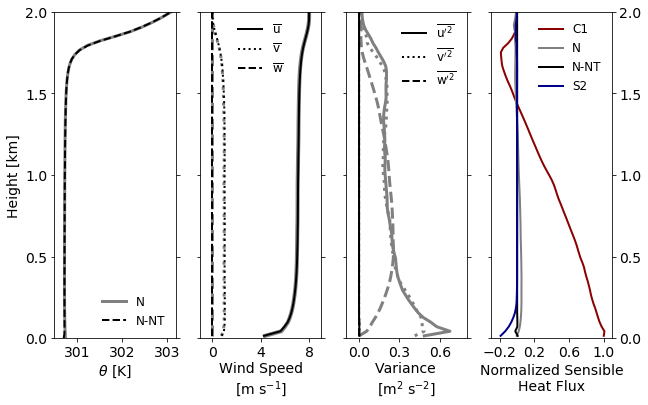

In [8]:
ymin, ymax = 0.0,2.0
plt.figure(figsize=(10,6))

Tmin,Tmax     = 300.5, 303.2
Umin,Umax     = -1, 9
varmin,varmax = -0.1,0.8
hfxmin,hfxmax = -0.3,1.1

ytics = np.arange(0,2.1,0.5)

Tplt = plt.subplot(141)
Uplt = plt.subplot(142,sharey=Tplt)
varplt = plt.subplot(143,sharey=Tplt)
hfxplt = plt.subplot(144,sharey=Tplt)

Tplt.tick_params(  labelsize=lblsize,right=True)
Uplt.tick_params(  labelsize=lblsize,right=True,labelleft=False)
varplt.tick_params(labelsize=lblsize,right=True,labelleft=False)
hfxplt.tick_params(labelsize=lblsize,right=True,labelleft=False,labelright=True)


# Avg T
Tplt.plot(etavgprf.T.loc[:,timeindN],zf,lw=3.0,c=colN,label='N')
Tplt.plot(ntavgprf.T.loc[:,0],zf,lw=2.0,c=colNnt,ls='--',label='N-NT')
Tplt.set_xticks((301,302,303))
Tplt.set_yticks(ytics)
Tplt.set_ylim(ymin,ymax)
Tplt.set_xlim(Tmin,Tmax)
Tplt.set_ylabel('Height [km]',size=lblsize)
Tplt.set_xlabel(r'$\theta$ [K]',size=lblsize)
Tplt.legend(frameon=False,fontsize=lgnsize)

# Avg U (turb)
Uplt.plot(etavgprf.u.loc[:,timeindN],zs,lw=4.0,ls='-',c=colN)
Uplt.plot(etavgprf.v.loc[:,timeindN],zs,lw=3.0,ls=':',c=colN)
Uplt.plot(etavgprf.w.loc[:,timeindN],zs,lw=3.0,ls='--',c=colN)
# NT
Uplt.plot(ntavgprf.u.loc[:,0],zs,lw=2.0,ls='-',c=colNnt,label='$\overline{\mathrm{u}}$')
Uplt.plot(ntavgprf.v.loc[:,0],zs,lw=2.0,ls=':',c=colNnt,label='$\overline{\mathrm{v}}$')
Uplt.plot(ntavgprf.w.loc[:,0],zs,lw=2.0,ls='--',c=colNnt,label='$\overline{\mathrm{w}}$')

Uplt.set_xticks((0.0,4.0,8.0))
Uplt.set_ylim(ymin,ymax)
Uplt.set_xlim(Umin,Umax)
Uplt.set_xlabel('Wind Speed\n[m s$^{-1}$]',size=lblsize)
Uplt.legend(frameon=False,fontsize=lgnsize)


# Variance Plot (turb)
varplt.plot(etavgprf.uvar.loc[:,timeindN],zs,lw=3.0,ls='-',c=colN)
varplt.plot(etavgprf.vvar.loc[:,timeindN],zs,lw=3.0,ls=':',c=colN)
varplt.plot(etavgprf.wvar.loc[:,timeindN],zs,lw=3.0,ls='--',c=colN)
# NT
varplt.plot(ntavgprf.uvar.loc[:,1],zs,lw=2.0,ls='-',c=colNnt,label=r"$\overline{\mathrm{u}'^2}$")
varplt.plot(ntavgprf.vvar.loc[:,1],zs,lw=2.0,ls=':',c=colNnt,label=r"$\overline{\mathrm{v}'^2}$")
varplt.plot(ntavgprf.wvar.loc[:,1],zs,lw=2.0,ls='--',c=colNnt,label=r"$\overline{\mathrm{w}'^2}$")

varplt.set_xticks((0.0,0.3,0.6))
varplt.set_ylim(ymin,ymax)
varplt.set_xlim(varmin,varmax)
varplt.set_xlabel('Variance\n[m$^2$ s$^{-2}$]',size=lblsize)
varplt.legend(frameon=False,fontsize=lgnsize)


# HFX Plot
hfxplt.plot(hfx0/hfx0[0],zs,lw=2.0,c=colC1,label='C1')
hfxplt.plot(normhfx.loc[:,timeindN],zs,lw=2.0,c=colN,label='N')
hfxplt.plot(normhfxnt.loc[:,timeindN],zs,lw=2.0,c=colNnt,label='N-NT')
hfxplt.plot(normhfx.loc[:,timeindS2],zs,lw=2.0,c=colS2,label='S2')
hfxplt.set_xlabel('Normalized Sensible\nHeat Flux',size=lblsize)
hfxplt.set_xticks((-0.2,0.2,0.6,1.0))
hfxplt.set_ylim(ymin,ymax)
hfxplt.set_xlim(hfxmin,hfxmax)
hfxplt.legend(frameon=False,fontsize=lgnsize)

plt.show()

# Figure 2
Horizontal cross section at t=~10 min of <b>temperature with quivers</b> OR <b>velocity</b> with contoured vertical vorticity (I expect them to not show up in the laminar runs, or will be substantially weaker) for the N-NT (left) and N-0x_0y (right).

### Get all of the restart data

In [112]:
nx,ny,nz,dx,dy,dz = octd.getdims("{}{}/{}/{}/".format(fdir,roughness,case[0],sims[0]))
Uf    = np.zeros((nsims,3,nx,ny))
Tf    = np.zeros((nsims,nx,ny))

In [114]:
for ss in range(0,nsims):
    print "{}{}/{}/{}/".format(fdir,roughness,case[0],sims[ss])
    Uf[ss,:,:,:]  = octd.readrst("{}{}/{}/{}/".format(fdir,roughness,case[0],sims[ss]),'vel','38',level=0)
    Tf[ss,:,:]    = octd.readrst("{}{}/{}/{}/".format(fdir,roughness,case[0],sims[ss]),'t','38',level=0)

/Volumes/External2TB/Downburst/MATLES/z0_0p1/MB_G08_ST303_Ns_6m/0x_0y/
/Volumes/External2TB/Downburst/MATLES/z0_0p1/MB_G08_ST303_Ns_6m/180x_0y/
/Volumes/External2TB/Downburst/MATLES/z0_0p1/MB_G08_ST303_Ns_6m/0x_180y/
/Volumes/External2TB/Downburst/MATLES/z0_0p1/MB_G08_ST303_Ns_6m/180x_180y/
/Volumes/External2TB/Downburst/MATLES/z0_0p1/MB_G08_ST303_Ns_6m/noturb/


In [ ]:
vvort = np.zeros((nsims,nx,ny,nz))
hvort = np.zeros((nsims,nx,ny,nz))
for ss in range(0,nsims):
    print "{}{}/{}/{}/".format(fdir,roughness,case[0],sims[ss])
    vvort[ss,:,:,:] = octd.readrst("{}{}/{}/{}/".format(fdir,roughness,case[0],sims[ss]),'Vvort','38')
    hvort[ss,:,:,:] = octd.readrst("{}{}/{}/{}/".format(fdir,roughness,case[0],sims[ss]),'Hvort','38')

/Volumes/External2TB/Downburst/MATLES/z0_0p1/MB_G08_ST303_Ns_6m/0x_0y/


In [ ]:
x = np.arange(0,nx+1)*dx
y = np.arange(0,ny+1)*dy
xy,yx = np.meshgrid(x/1000.0,y/1000.0)
xys = (xy[1:,1:] + xy[:-1,:-1])*0.5
yxs = (yx[1:,1:] + yx[:-1,:-1])*0.5

Velf = (Uf[:,0,:,:]**2 + Uf[:,1,:,:]**2)**0.5
maxVvort = np.nanmax(vvort,axis=3)
maxHvort = np.nanmax(hvort,axis=3)

In [ ]:
print np.max(maxVvort)
print np.max(maxHvort)

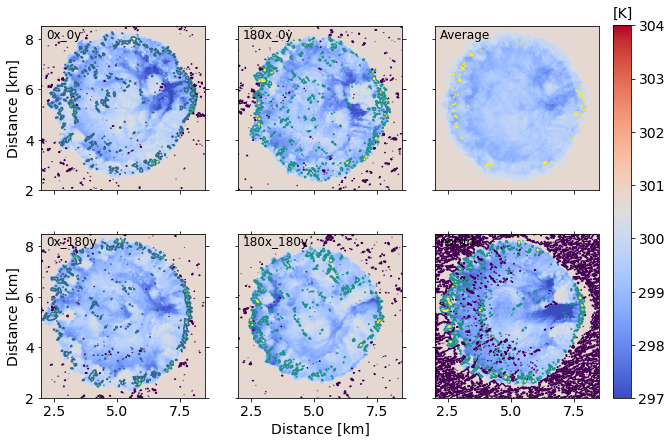

In [133]:
pltstr = 'Temperature'
#pltstr = 'Velocity'

ymin = 2; ymax = 8.5
xmin = 2; xmax = 8.5
txtx = xmin*1.1; txty = ymax*0.99
xtics = np.arange(0,10.1,2.0)
vortlvl = np.arange(0.01,1.0,0.2)

if pltstr == 'Temperature':
    units = '[K]'
    cmap = cm.coolwarm
    pmin = 297; pmax = 304
    pltvar = Tf
elif pltstr == 'Velocity':
    units = '[m s$^{-1}$]'
    cmap = cm.viridis
    pmin = 0; pmax = 30
    pltvar = Velf

fig2 = plt.figure(figsize=(10,7))

for ss in range(0,nsims+1):
    pltnum = 231+ss
    plt.subplot(pltnum,aspect='equal')
    plt.tick_params(labelsize=lblsize)
    if ss == 0 or ss == 3: plt.ylabel('Distance [km]',size=lblsize)
    if ss == 1 or ss == 4: plt.tick_params(labelleft=False)
    if ss == 2 or ss == 5: plt.tick_params(labelleft=False)
    if ss != 2 and ss != 5: plt.tick_params(right=True)
    if ss == 4: plt.xlabel('Distance [km]',size=lblsize)

    if ss < 3: 
        plt.tick_params(labelbottom=False)
    else:
        plt.tick_params(top=True)
    if ss < 2: 
        plt.pcolormesh(xy,yx,pltvar[ss,:,:],cmap=cmap,norm=Normalize(pmin,pmax))
        plt.contour(xys,yxs,maxHvort[ss,:,:].T,levels=vortlvl)
        plt.text(txtx,txty,sims[ss],ha='left',va='top',size=txtsize)
    elif ss == 2: 
        diffplt = plt.pcolormesh(xy,yx,np.mean(pltvar[:4,:,:],axis=0),cmap=cmap,norm=Normalize(pmin,pmax))
        plt.contour(xys,yxs,np.mean(maxHvort[:4,:,:],axis=0).T,levels=vortlvl)
        plt.text(txtx,txty,'Average',ha='left',va='top',size=txtsize)
    elif ss > 2: 
        plt.pcolormesh(xy,yx,pltvar[ss-1,:,:],cmap=cmap,norm=Normalize(pmin,pmax))
        plt.contour(xys,yxs,maxHvort[ss-1,:,:].T,levels=vortlvl)
        plt.text(txtx,txty,sims[ss-1],ha='left',va='top',size=txtsize)     
    plt.ylim(ymin,ymax)
    plt.xlim(xmin,xmax)
cax = fig2.add_axes([0.92, 0.133, 0.025, 0.74])
cax.text(0.5,1.02,'[K]',ha='center',size=lblsize)
cax.tick_params(labelsize=lblsize)
plt.colorbar(diffplt,cax)
plt.show()

# Figure 3
Max. radial velocity for N-NT (left) and N-0x_0y... N-180x_180y to show the variability even with neutral turbulence... (Figure 9 in WES paper)

<font color=red> <b> NEED TO RE-WRITE THIS SCRIPT TO CALCULATE RADIAL VELOCITY </b> </font>

# Figure 4
Time/Height of max velocity -- Get the data

In [13]:
maxnt = 0
for ss in range(0,nsims):
    var = octd.avgprofiles("{}{}/{}/{}/".format(fdir,roughness,case[0],sims[ss]),['au'],dt=1.0)
    nt = np.shape(var.u)[1]
    if nt > maxnt: maxnt = nt
maxU = np.zeros((nsims,nz+1,maxnt))
minW = np.zeros((nsims,nz+1,maxnt))
maxW = np.zeros((nsims,nz+1,maxnt))
avgU = np.zeros((nsims,nz+1,maxnt))
for ss in range(0,nsims):
    avgprf = octd.avgprofiles("{}{}/{}/{}/".format(fdir,roughness,case[0],sims[ss]),\
                          ['au','av','mxM','mnW','mxW'],dt=1.0)
    #                     ['au','av','aw','aT','au2','av2','aw2','awT','aqz','atxy','mxM','mnW'],dt=1.0)
    ntloc = np.shape(avgprf.maxW)[1]
    avgU[ss,:,:ntloc] = (avgprf.u**2 + avgprf.v**2)**0.5
    maxU[ss,:,:np.shape(avgprf.maxVel)[1]] = avgprf.maxVel
    minW[ss,:,:ntloc] = avgprf.minW
    maxW[ss,:,:ntloc] = avgprf.maxW

tz,zt = np.meshgrid(avgprf.time[:780]/60.0,avgprf.zs/1000.0)

### Plot time/heights of max velocity

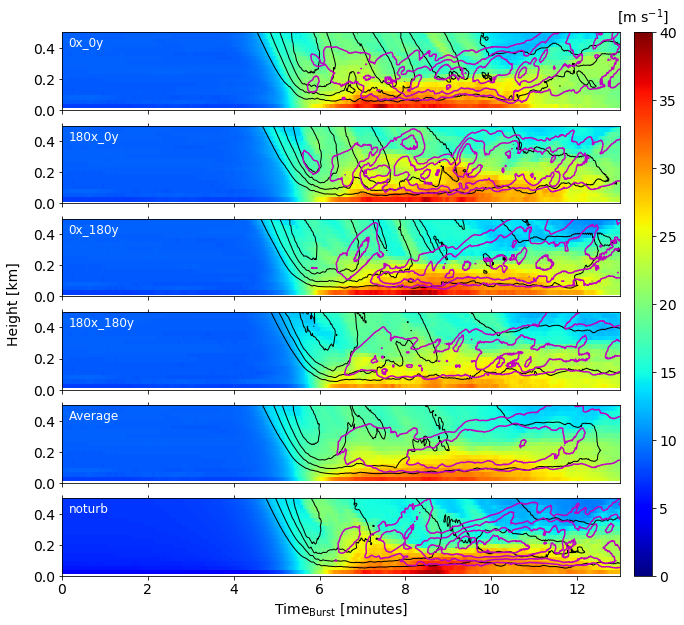

In [36]:
cmap = cm.jet
ytics = np.arange(0.0,0.6,0.2)
ymin,ymax = 0.0,0.5
xmin,xmax = 0.0,13.0
pmin,pmax = 0.0,40.0
wminlevs  = np.arange(10,60,5.0)
wmaxlevs  = np.arange(10,60,2.5)
txtx,txty = 0.15,0.47

avgUf   = np.mean(avgU[:4,:,:780],axis=0)
avgmaxU = np.mean(maxU[:4,:,:780],axis=0)
avgminW = np.mean(minW[:4,:,:780],axis=0)
avgmaxW = np.mean(maxW[:4,:,:780],axis=0)
fig = plt.figure(figsize=(10,10))
for ss in np.arange(0,nsims+1):
    pltnum = 611+ss
    plt.subplot(pltnum)
    if ss <  nsims-1: 
        contVel = plt.pcolormesh(tz,zt,maxU[ss,:,:780],cmap=cmap,norm=Normalize(pmin,pmax))
        plt.contour(tz,zt,-1*minW[ss,:,:780],colors='k',linewidths=1.0,levels=wminlevs)
        plt.contour(tz,zt,maxW[ss,:,:780],colors='m',linewidths=1.5,levels=wmaxlevs)
        plt.text(txtx,txty,sims[ss],ha='left',va='top',size=txtsize,color='w')
    if ss == nsims-1: 

        plt.pcolormesh(tz,zt,avgmaxU,cmap=cmap,norm=Normalize(pmin,pmax))
        plt.contour(tz,zt,-1*avgminW,colors='k',linewidths=1.0,levels=wminlevs)
        plt.contour(tz,zt,avgmaxW,colors='m',linewidths=1.5,levels=wmaxlevs)
        plt.text(txtx,txty,'Average',ha='left',va='top',size=txtsize,color='w')
    if ss >  nsims-1: 
        plt.pcolormesh(tz,zt,maxU[ss-1,:,:780],cmap=cmap,norm=Normalize(pmin,pmax))
        plt.contour(tz,zt,-1*minW[ss-1,:,:780],colors='k',linewidths=1.0,levels=wminlevs)
        plt.contour(tz,zt,maxW[ss-1,:,:780],colors='m',linewidths=1.5,levels=wmaxlevs)
        plt.xlabel('Time$_{\mathrm{Burst}}$ [minutes]',size=lblsize)
        plt.text(txtx,txty,sims[ss-1],ha='left',va='top',size=txtsize,color='w')

    plt.tick_params(labelsize=lblsize)
    if ss < nsims: plt.tick_params(labelbottom=False)
    if ss >0: plt.tick_params(top=True)
    if ss == 3: plt.text(-0.95,0.55,'Height [km]',size=lblsize,rotation=90.0,ha='right',va='center')

    plt.yticks(ytics)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)

cax = fig.add_axes([0.92, 0.125, 0.025, 0.755])
cax.text(0.5,1.02,'[m s$^{-1}$]',ha='center',size=lblsize)
cax.tick_params(labelsize=lblsize)
plt.colorbar(contVel,cax)
plt.show()

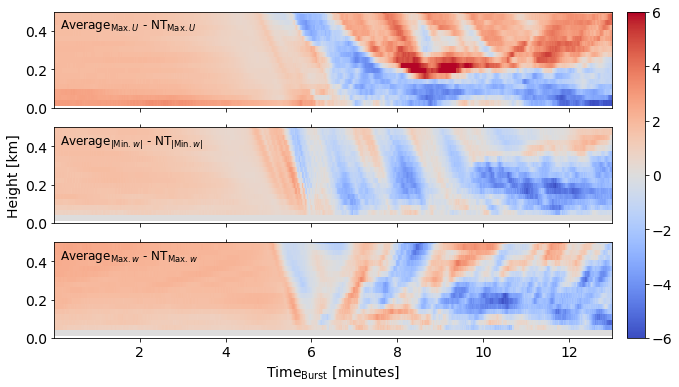

In [31]:
diffnorm = Normalize(-6,6)

fig5 = plt.figure(figsize=(10,6))
plt1 = plt.subplot(311)
plt2 = plt.subplot(312)
plt3 = plt.subplot(313)

plt1.tick_params(labelsize=lblsize,labelbottom=False)
plt2.tick_params(labelsize=lblsize,labelbottom=False,top=True)
plt3.tick_params(labelsize=lblsize,top=True)

contDiff = plt1.pcolormesh(tz,zt,avgmaxU-maxU[ss-1,:,:780],cmap=cm.coolwarm,norm=diffnorm)#,cmap=cmap,norm=Normalize(pmin,pmax))
plt1.text(txtx,txty,'Average$_{\mathrm{Max.} U}$ - NT$_{\mathrm{Max.} U}$',ha='left',va='top',size=txtsize,color='k')
plt1.set_ylim(ymin,ymax)

plt2.pcolormesh(tz,zt,(np.abs(avgminW)-np.abs(minW[ss-1,:,:780])),cmap=cm.coolwarm,norm=diffnorm)#,colors='k',linewidths=1.0)#,levels=wminlevs)
plt2.text(txtx,txty,'Average$_{|\mathrm{Min.} w|}$ - NT$_{|\mathrm{Min.} w|}$',ha='left',va='top',size=txtsize,color='k')
plt2.set_ylim(ymin,ymax)
plt2.set_ylabel('Height [km]',size=lblsize)

plt3.pcolormesh(tz,zt,avgmaxW-maxW[ss-1,:,:780],cmap=cm.coolwarm,norm=diffnorm)#,colors='m',linewidths=1.5)#,levels=wmaxlevs)
plt3.set_xlabel('Time$_{\mathrm{Burst}}$ [minutes]',size=lblsize)
plt3.text(txtx,txty,'Average$_{\mathrm{Max.} w}$ - NT$_{\mathrm{Max.} w}$',ha='left',va='top',size=txtsize,color='k')
plt3.set_ylim(ymin,ymax)
caxDiff = fig5.add_axes([0.92, 0.125, 0.025, 0.755])
caxDiff.tick_params(labelsize=lblsize)
plt.colorbar(contDiff,caxDiff)
plt.show()